In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

Reading the train data:

In [2]:
train = pd.read_csv('Data/Raw/train.csv')

In [11]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


Changes to be made:
Dummy variables or factorizing for Product_ID, Gender, City_Category and Ages.

Checking for missing data:

In [5]:
null_values = pd.DataFrame(pd.isnull(train).any())
null_values['Sum'] = pd.isnull(train).sum()
null_values

,0,Sum
User_ID,False,0
Product_ID,False,0
Gender,False,0
Age,False,0
Occupation,False,0
City_Category,False,0
Stay_In_Current_City_Years,False,0
Marital_Status,False,0
Product_Category_1,False,0
Product_Category_2,True,173638


Because the missing data is from categories, it may be important to keep it for the analysis, so the null values are going to be replaced by 0.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [26]:
train.fillna(0,inplace=True)

In [20]:
train['Product_ID'] = pd.factorize(train['Product_ID'])[0]

In [24]:
## Product_ID, Gender, City_Category and Ages
train['Age'] = pd.factorize(train['Age'])[0]
train['Gender'] = pd.factorize(train['Gender'])[0]
train['City_Category'] = pd.factorize(train['City_Category'])[0]

In [30]:
train['Stay_In_Current_City_Years'] = pd.factorize(train['Stay_In_Current_City_Years'])[0]

In [32]:
train.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,0,10,0,0,0,3,0.0,0.0,8370
1,1000001,1,0,0,10,0,0,0,1,6.0,14.0,15200
2,1000001,2,0,0,10,0,0,0,12,0.0,0.0,1422
3,1000001,3,0,0,10,0,0,0,12,14.0,0.0,1057
4,1000002,4,1,1,16,1,1,0,8,0.0,0.0,7969
5,1000003,5,1,2,15,0,2,0,1,2.0,0.0,15227
6,1000004,6,1,3,7,2,0,1,1,8.0,17.0,19215
7,1000004,7,1,3,7,2,0,1,1,15.0,0.0,15854
8,1000004,8,1,3,7,2,0,1,1,16.0,0.0,15686
9,1000005,9,1,2,20,0,3,1,8,0.0,0.0,7871


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
Product_ID                    550068 non-null int64
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(9)
memory usage: 46.2 MB


Because the User_ID is a unique number is not related to the "Purchase" variable, so it is discarded.

In [35]:
train.drop('User_ID', axis=1,inplace=True)

Checking for correlations with "Purchase", any outliers in the data and multicollinearity.

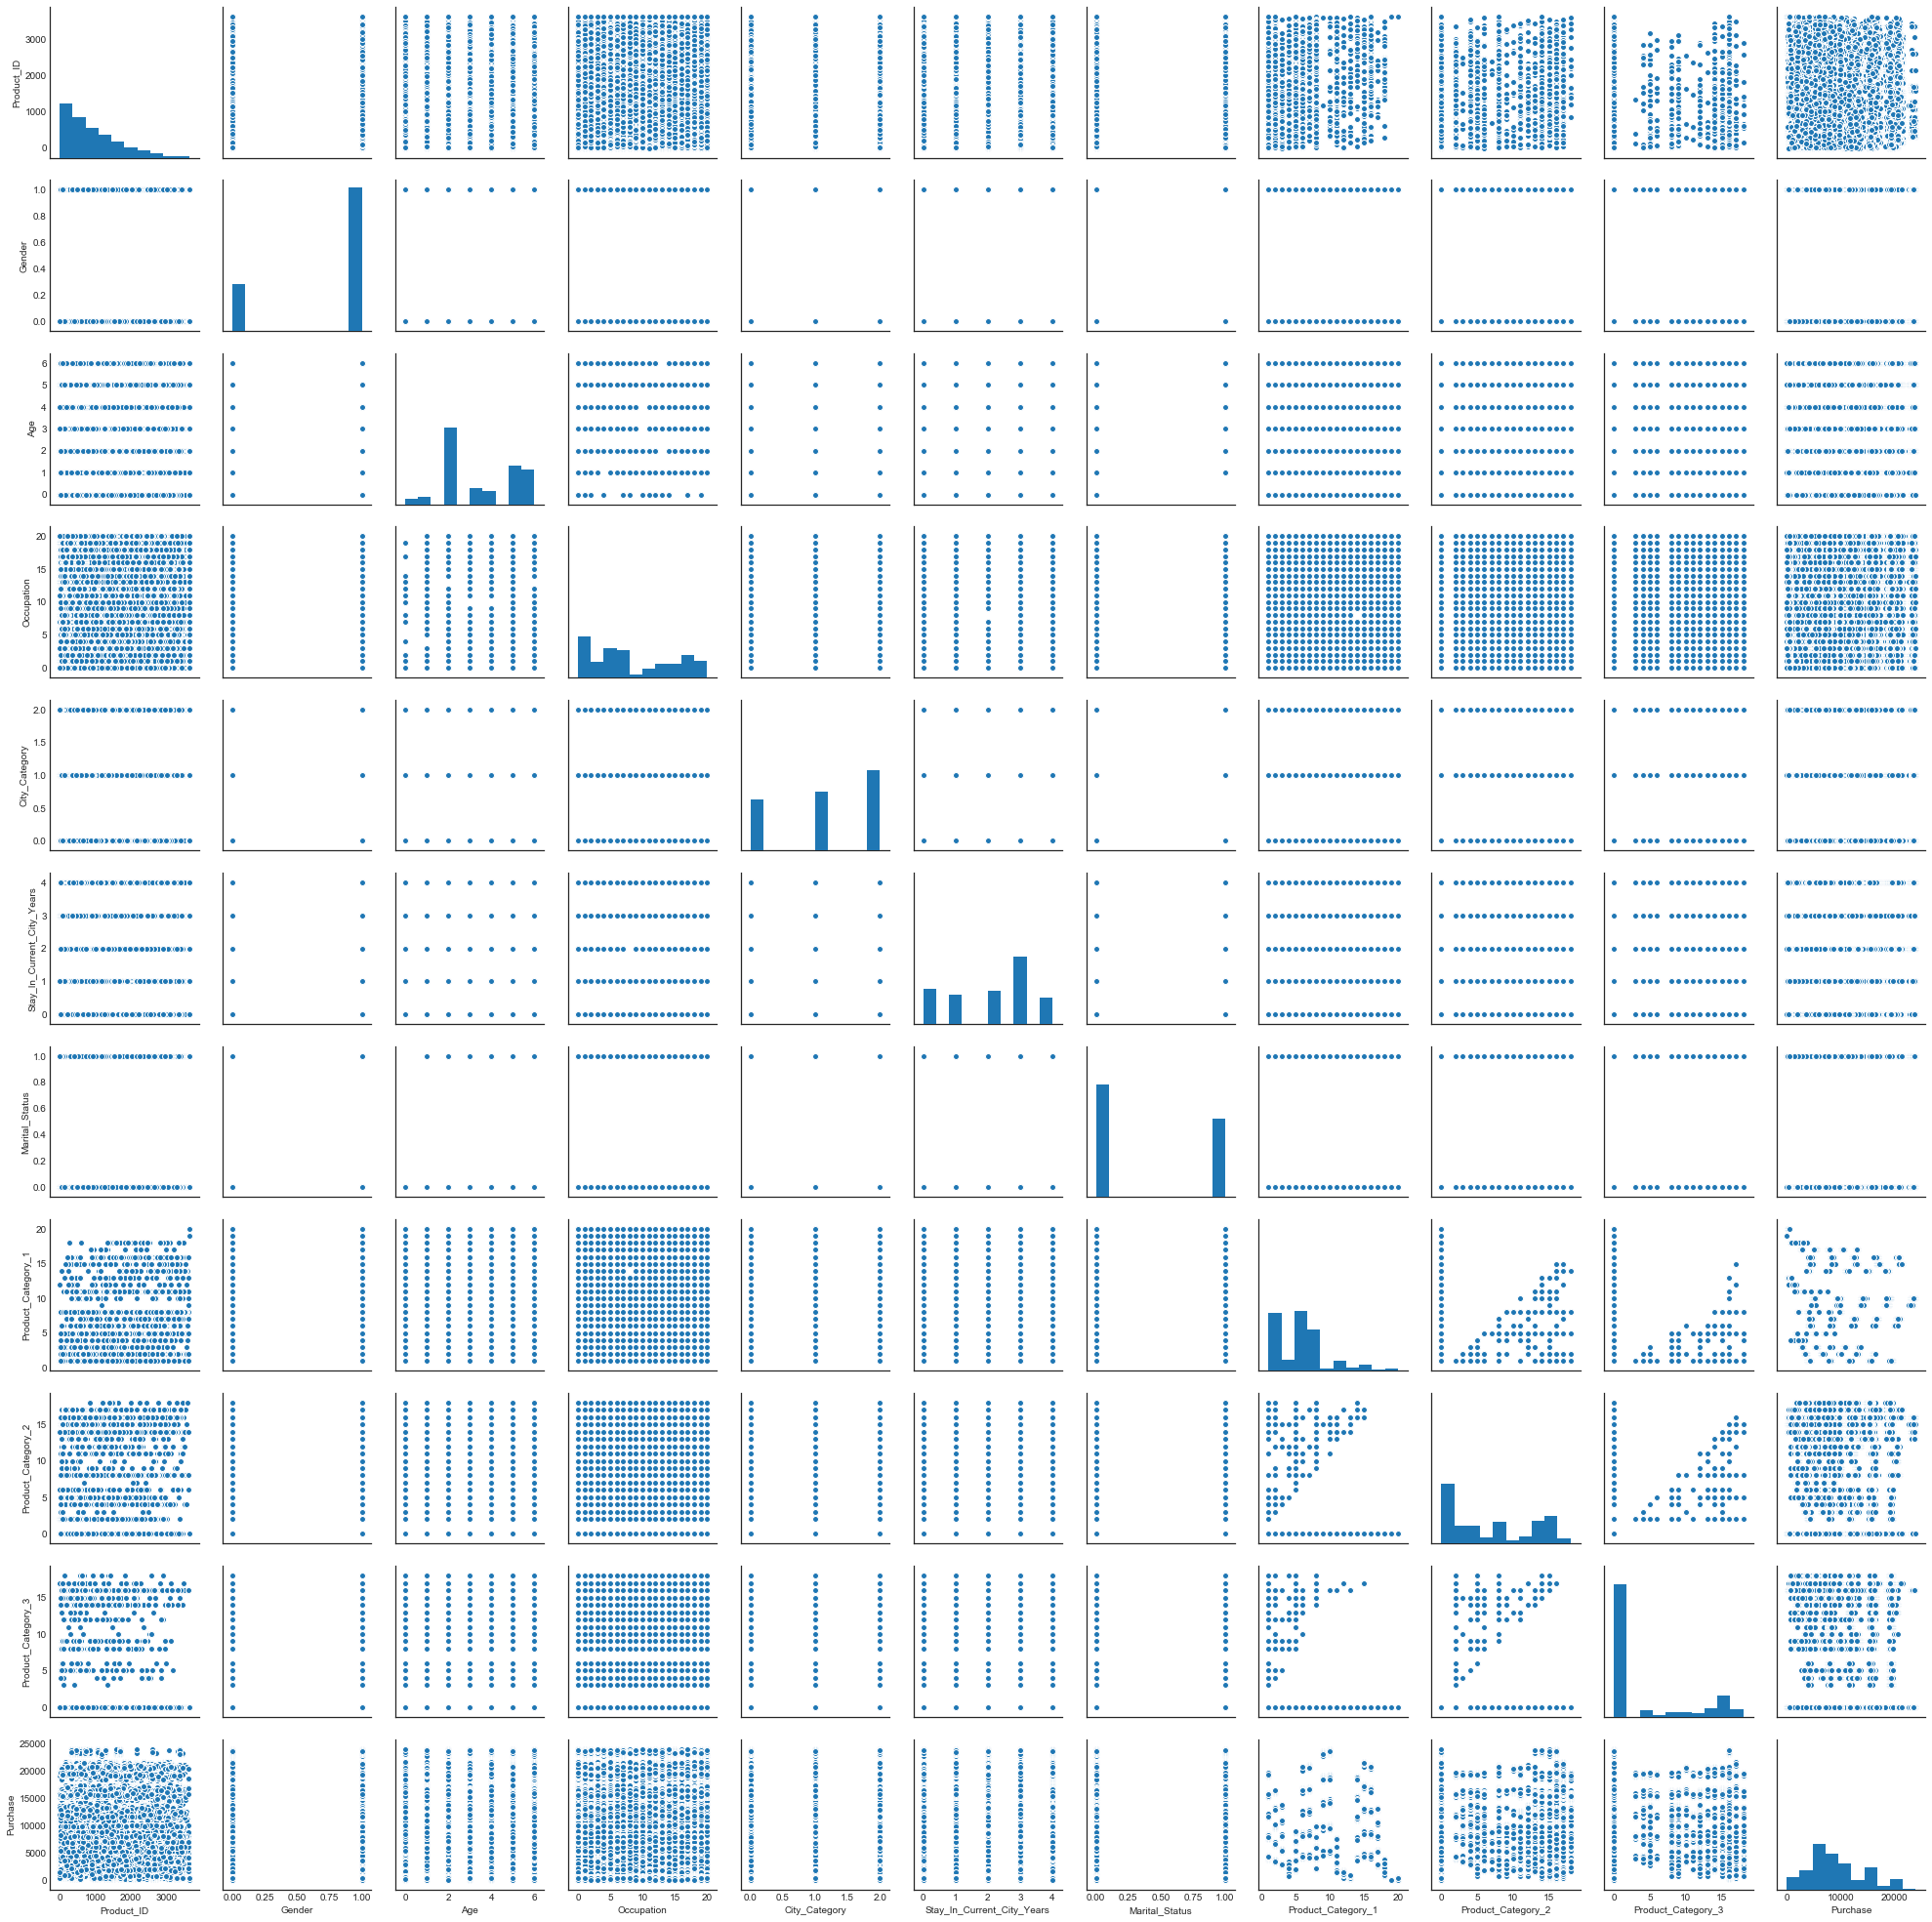

In [36]:
sns.pairplot(train)

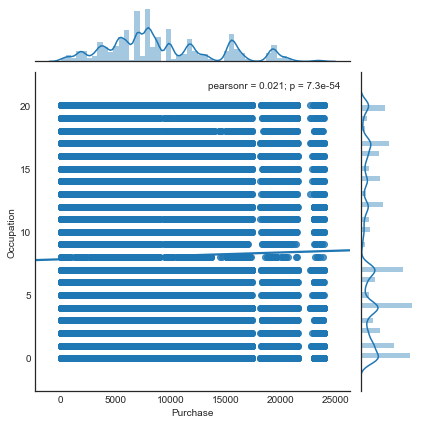

In [38]:
sns.jointplot(x = 'Purchase',y = 'Occupation',data=train,kind='reg')

With such a low Pearson coefficient it might be useful to compare the results with and without the occupation data.

Now cleaning the test data:

In [59]:
test = pd.read_csv('Data/Raw/test.csv')
test.fillna(0,inplace=True)
dfp =  pd.read_csv('Data/Raw/test.csv')
test['Age'] = pd.factorize(test['Age'])[0]
test['Gender'] = pd.factorize(test['Gender'])[0]
test['City_Category'] = pd.factorize(test['City_Category'])[0]
test['Product_ID'] = pd.factorize(test['Product_ID'])[0]
test['Stay_In_Current_City_Years'] = pd.factorize(test['Stay_In_Current_City_Years'])[0]

In [42]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,0,0,0,7,0,0,1,1,11.0,0.0
1,1000009,1,0,1,17,1,1,0,3,5.0,0.0
2,1000010,2,1,2,1,0,2,1,5,14.0,0.0
3,1000010,3,1,2,1,0,2,1,4,9.0,0.0
4,1000011,4,1,1,1,1,3,0,4,5.0,12.0


In [48]:
X_train = train.drop('Purchase',axis=1)
y_train = train['Purchase']

In [52]:
X_test = test.drop('User_ID',axis=1)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lm.coef_

array([  -0.93567218,  465.07794587,   -4.1804152 ,    8.76836406,
         31.03161365,  -12.5439276 ,   70.45580962, -299.78912779,
          5.13779719,  133.40170767])

In [53]:
predictions = lm.predict(X_test)

In [54]:
predictions

array([ 10656.16686161,  10056.36125252,   9849.57147356, ...,
        12168.84250606,   8020.13057185,   9112.77172657])

In [67]:
df = pd.DataFrame(dfp['User_ID'])
df['Product_ID']=dfp['Product_ID']
df['Purchase']=predictions
df.to_csv("data/results/Submission Simple LR.csv", encoding='utf-8', index=False)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN
